# Estudo de caso! Alugar, pagar à vista ou financiar um imóvel?
> Temos aqui um estudo de caso em matemática financeira resolvido em Python, que envolve calcular diferentes cenários com relação a aquisição de um imóvel. Adicionalmente, aprenda a manipular tabelas em Pandas e apresentação de gráficos com Matplotlib.

- toc: true
- badges: true
- comments: true
- author: [Felipe N. Schuch, Mathiaz S. Tessmann]
- image: images/house.png
- hide: true
- search_exclude: true
- categories: [Matemática Financeira, Pandas, Matplotlib]

## Introdução

* [Pandas](https://pandas.pydata.org/) é um pacote Python que fornece estruturas de dados rápidas, flexíveis e expressivas, projetadas para tornar o trabalho com dados “relacionais” ou “rotulados” fáceis e intuitivos. O objetivo é ser o alicerce fundamental de alto nível para a análise prática de dados do mundo real em Python. Além disso, tem o objetivo mais amplo de se tornar a mais poderosa e flexível ferramenta de análise / manipulação de dados de código aberto disponível em qualquer linguagem. Pandas é bem adequado para muitos tipos diferentes de dados:
    * Dados tabulares com colunas de tipos heterogêneos, como em uma tabela SQL, arquivo `.csv` ou planilha do Excel;
    * Dados de séries temporais ordenados e não ordenados (não necessariamente de frequência fixa);
    * Dados de matriz arbitrária (homogeneamente digitados ou heterogêneos) com rótulos de linha e coluna;
    * Qualquer outra forma de conjuntos de dados observacionais / estatísticos. Os dados realmente não precisam ser rotulados para serem colocados em uma estrutura de dados de pandas.
* [Matplotlib](https://matplotlib.org/) é uma biblioteca de plotagem 2D do Python, que produz figuras de qualidade de publicação em uma variedade de formatos impressos e ambientes interativos entre plataformas. Matplotlib pode ser usado em scripts Python, nos shells do Python e do IPython, no notebook Jupyter, nos servidores de aplicativos da web e em quatro kits de ferramentas de interface gráfica do usuário. **Matplotlib tenta tornar as coisas fáceis simples e as coisas difíceis possíveis**. Você pode gerar gráficos, histogramas, espectros de potência, gráficos de barras, gráficos de erros, diagramas de dispersão, etc., com apenas algumas linhas de código.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#hide

# https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html
plt.rcdefaults()
plt.rcParams.update({'figure.dpi' : 90,
                     "figure.figsize" : (10, 6)})

# https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
plt.style.use('ggplot')

In [3]:
#hide

#https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
pd.options.mode.chained_assignment = None  # default='warn'

> Important: Essa não é uma recomendação de comprar. Lucros passados não são garantia de lucros futuros. Esse é um estudo de cenários didáticos e hipotéticos. Os autores se eximem completamente de qualquer responsabilidade sobre o uso, interpretação e consequências do uso direto ou indireto de qualquer informação contida nesse material.

## Sistemas de Amortização

$$
\text{Parcela} = SD_0 \dfrac{i}{1-(1+i)^{-n}}
$$

In [4]:
#collapse-hide
def sistema_pagamento(sis='sac',i=0.05,N=10,SD0=1000.00):

    df = pd.DataFrame(columns=['Juros',
                               'Amortização',
                               'Parcela',
                               'Saldo Devedor'],
                      index=range(N+1)
                     )
    if sis.lower() == 'sac':
    
        df['Amortização'][1:] = SD0/N
        df['Saldo Devedor'][0] = SD0

        for n in df.index[1:]:
            df['Juros'][n] = df['Saldo Devedor'][n-1]*i
            df['Parcela'][n] = df['Juros'][n]+df['Amortização'][n]
            df['Saldo Devedor'][n] = df['Saldo Devedor'][n-1] - df['Amortização'][n]
    
    elif sis.lower() == 'price':
        
        df['Parcela'][1:] = round(SD0*(i)/(1-(1+i)**(-N)),2)
        df['Saldo Devedor'][0] = SD0

        for n in df.index[1:]:
            df['Juros'][n] = round(df['Saldo Devedor'][n-1]*i,2)
            df['Amortização'][n] = df['Parcela'][n] - df['Juros'][n]
            df['Saldo Devedor'][n] = df['Saldo Devedor'][n-1] - df['Amortização'][n]
    
    else:
        print('Valor inválido para sis, tente novamente com sac ou price')
    
    # Aqui ajustamos a última parcela caso tenha valor residual devido ao arredondamento
    df['Parcela'][N] += df['Saldo Devedor'][N]
    df['Saldo Devedor'][N] -= df['Saldo Devedor'][N]
    
    return df

In [5]:
sistema_pagamento('sac',0.05,4,1000)

,Juros,Amortização,Parcela,Saldo Devedor
0,NaN,NaN,NaN,1000
1,50,250,300,750
2,37.5,250,287.5,500
3,25,250,275,250
4,12.5,250,262.5,0


In [6]:
sistema_pagamento('price',0.05,4,1000)

,Juros,Amortização,Parcela,Saldo Devedor
0,NaN,NaN,NaN,1000
1,50,232.01,282.01,767.99
2,38.4,243.61,282.01,524.38
3,26.22,255.79,282.01,268.59
4,13.43,268.58,282.02,0


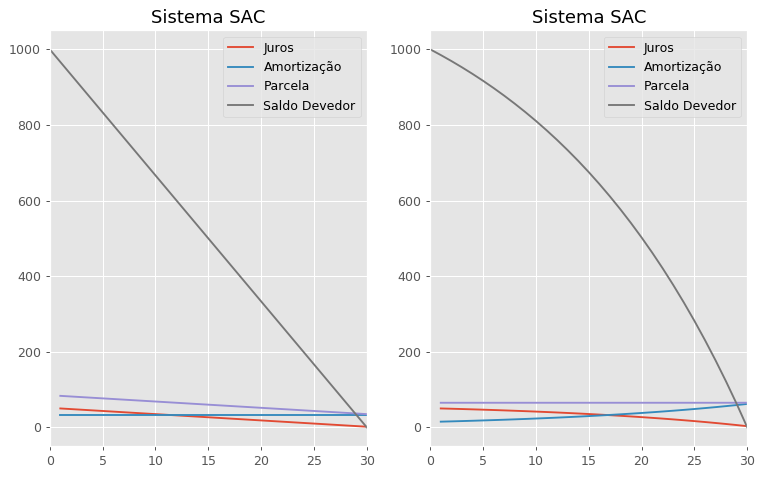

In [7]:
#hide

fig, (ax1, ax2) = plt.subplots(1, 2)

sistema_pagamento('sac',0.05,30,1000).plot(ax=ax1,title='Sistema SAC');
sistema_pagamento('price',0.05,30,1000).plot(ax=ax2,title='Sistema SAC');

## Cenários

In [8]:
entrada = 100000.00
valor_do_financiamento = 400000.00
taxa_financeamento_anual = 0.0942
taxa_aluguel_anual = 0.04
rendimento_investimentos_anual = 0.08
tempo_anos = 30

sistema = 'SAC'
#sistema = 'PRICE'

In [9]:
def taxa_anual_para_mensal(i):
    return (1.+i)**(1./12.)-1.

In [10]:
valor_do_imovel = entrada + valor_do_financiamento
taxa_financeamento = taxa_anual_para_mensal(taxa_financeamento_anual)
taxa_aluguel = taxa_anual_para_mensal(taxa_aluguel_anual)
rendimento_investimentos = taxa_anual_para_mensal(rendimento_investimentos_anual)
tempo = tempo_anos * 12

### Financiar

In [11]:
financiar = sistema_pagamento(sistema, taxa_financeamento,tempo,valor_do_financiamento)

In [12]:
financiar['Patrimônio - Imóvel'] = financiar['Amortização'].cumsum() + entrada
financiar['Custo - Juros'] = financiar['Juros'].cumsum()

In [13]:
financiar

,Juros,Amortização,Parcela,Saldo Devedor,Patrimônio - Imóvel,Custo - Juros
0,NaN,NaN,NaN,400000,NaN,NaN
1,3012.07,1111.11,4123.18,398889,101111,3012.07
2,3003.7,1111.11,4114.81,397778,102222,6015.77
3,2995.33,1111.11,4106.44,396667,103333,9011.1
4,2986.97,1111.11,4098.08,395556,104444,11998.1
...,...,...,...,...,...,...
356,41.8343,1111.11,1152.95,4444.44,495556,543595
357,33.4674,1111.11,1144.58,3333.33,496667,543628
358,25.1006,1111.11,1136.21,2222.22,497778,543653
359,16.7337,1111.11,1127.84,1111.11,498889,543670


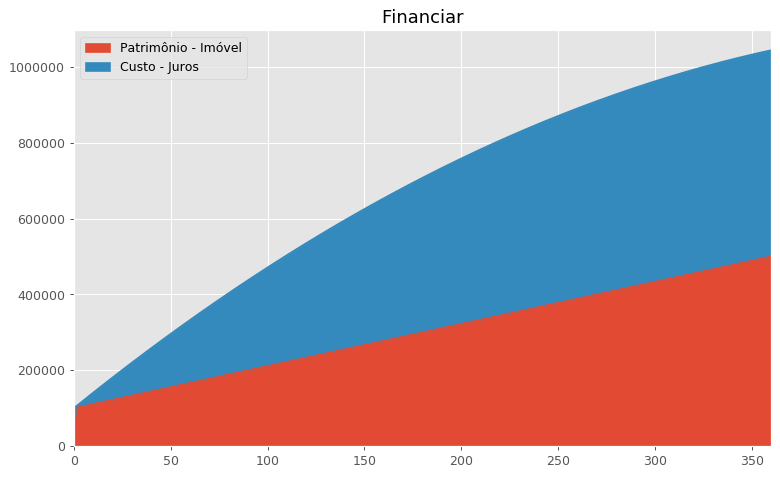

In [14]:
financiar[['Patrimônio - Imóvel', 'Custo - Juros']].plot.area(title='Financiar');

### Alugar

In [15]:
alugar = pd.DataFrame(index=range(tempo+1))

In [16]:
aluguel = round((valor_do_imovel)*taxa_aluguel,2)
alugar['Aluguel'] = aluguel
alugar['Aluguel'][0] = 0.0
alugar['Custo - Aluguel'] = alugar['Aluguel'].cumsum()
alugar['Aportes'] = financiar['Parcela'] - aluguel
alugar['Aportes'][0] = entrada

In [17]:
alugar['Patrimônio'] = alugar['Aportes']

for n in alugar.index[1:]:
    alugar['Patrimônio'][n] = alugar['Aportes'][n] + alugar['Patrimônio'][n-1] * (1. + rendimento_investimentos)

In [18]:
alugar['Patrimônio - Principal'] = alugar['Aportes'].cumsum()
alugar['Patrimônio - Rendimentos'] = alugar['Patrimônio'] - alugar['Patrimônio - Principal']

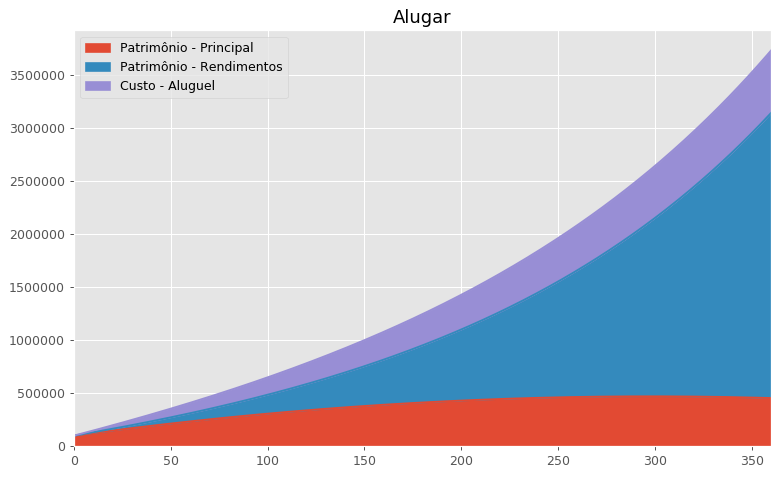

In [19]:
alugar[['Patrimônio - Principal', 'Patrimônio - Rendimentos', 'Custo - Aluguel']].plot.area(title='Alugar');

### Poupar e Comprar à Vista

O imóvel será comprado no mês 103


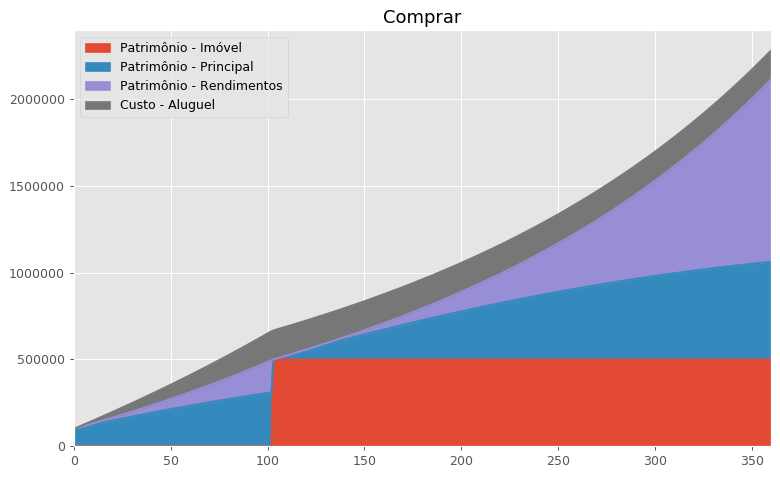

In [20]:
comprar = alugar.copy()

tcompra = comprar[comprar['Patrimônio']>=valor_do_imovel].first_valid_index()

print(f'O imóvel será comprado no mês {tcompra}')

comprar['Patrimônio - Imóvel'] = 0.0
comprar['Patrimônio - Imóvel'][tcompra::] += valor_do_imovel

comprar['Patrimônio'][tcompra::] -= valor_do_imovel
comprar['Patrimônio - Principal'][tcompra] -=  valor_do_imovel - comprar['Patrimônio - Rendimentos'][tcompra]
comprar['Patrimônio - Rendimentos'][tcompra] = 0.0
#

comprar['Aportes'][tcompra::] += comprar['Aluguel'][tcompra::]
comprar['Aluguel'][tcompra::] = 0.0
comprar['Custo - Aluguel'] = comprar['Aluguel'].cumsum()

for n in alugar.index[tcompra+1:]:
    comprar['Patrimônio - Principal'][n] = comprar['Patrimônio - Principal'][n-1] + comprar['Aportes'][n]
    comprar['Patrimônio - Rendimentos'][n] = comprar['Patrimônio'][n-1] * rendimento_investimentos + comprar['Patrimônio - Rendimentos'][n-1]
    comprar['Patrimônio'][n] = comprar['Patrimônio - Principal'][n] + comprar['Patrimônio - Rendimentos'][n]

comprar[['Patrimônio - Imóvel', 'Patrimônio - Principal', 'Patrimônio - Rendimentos', 'Custo - Aluguel']].plot.area(title='Comprar');

## Conclusão

In [21]:
summary = pd.DataFrame()

summary = summary.append(alugar.tail(1), ignore_index=True, sort=False)
summary = summary.append(comprar.tail(1), ignore_index=True, sort=False)
summary = summary.append(financiar.tail(1), ignore_index=True, sort=False)

summary.drop(['Aluguel', 'Aportes', 'Patrimônio', 'Juros', 'Amortização', 'Parcela', 'Saldo Devedor'], axis=1, inplace=True)

summary.index = ['Alugar', 'Comprar à Vista', 'Financiar']
summary

,Custo - Aluguel,Patrimônio - Principal,Patrimônio - Rendimentos,Patrimônio - Imóvel,Custo - Juros
Alugar,589273.20,454405,2.69041e+06,NaN,NaN
Comprar à Vista,166960.74,562982,1.05087e+06,500000,NaN
Financiar,NaN,NaN,NaN,500000,543678


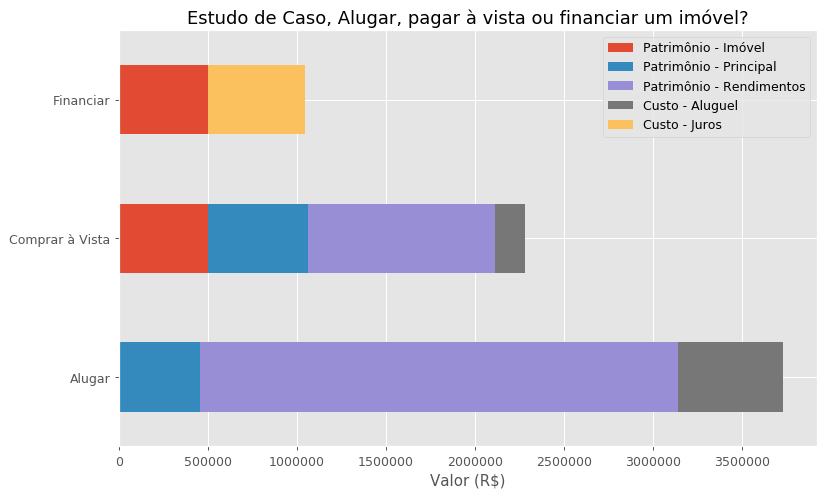

In [22]:
#hide_input

summary[['Patrimônio - Imóvel', 'Patrimônio - Principal', 'Patrimônio - Rendimentos', 'Custo - Aluguel', 'Custo - Juros']].plot.barh(stacked=True)
plt.title('Estudo de Caso, Alugar, pagar à vista ou financiar um imóvel?')
plt.xlabel('Valor (R$)')

#position bottom right
# plt.text(0., -1., '@aprenda.py, por F.N. Schuch & M.S. Tessmann',
#          fontsize=12, color='gray',
#          ha='left', va='bottom', xycoords='figure fraction')

plt.show()